#CEFET/RJ

**PPCIC - Programa de Pós-Graduação em Ciência da Computação**

**Mestrado em Ciência da Computação**

---

**Disciplina**: Aprendizado de Máquina

**Professor**: Eduardo Bezerra

**Aluno**: Janio de Souza Lima

#Introdução

Geração de conjuntos de valores e plotagens para ilustrar os conceitos da representação de valores como pontos em um espaço $n-$dimensional e a analisar a distância entre estes pontos.

Esta intuição é básica para estudo e aplicação dos algoritmos $k-NN$.

Detalhes sobre estes conceitos e o algoritmos disponíveis no notebook: dimensional

In [29]:
import numpy as np

X = np.array([[-0.1, 1.4],
              [-0.5,-0.1],
              [ 1.3, 0.9],
              [-0.6, 0.4],
              [-1.5, 0.4],
              [ 0.2, 0.2],
              [-0.3,-0.4],
              [ 0.7,-0.8],
              [ 1.1,-1.5],
              [-1.0, 0.9],
              [-0.5,-1.5],
              [-1.3,-0.4],
              [-1.4,-1.2],
              [-0.9,-1.1],
              [ 0.4,-1.3],
              [-0.4, 0.6],
              [ 0.3,-0.5]])

y = np.array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1])

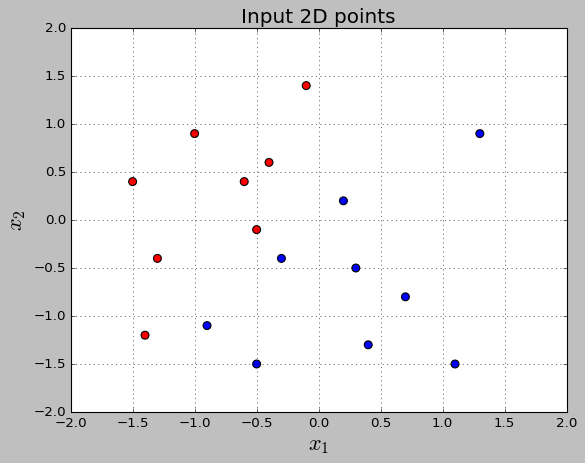

In [30]:
import matplotlib.pyplot as plt
plt.style.use('classic')
np.set_printoptions(precision=3, suppress=True)

colormap = np.array(['r', 'b'])

def plot_scatter(X, y, colormap):
  plt.grid()
  plt.xlim([-2.0, 2.0])
  plt.ylim([-2.0, 2.0])
  plt.xlabel('$x_1$', size=20)
  plt.ylabel('$x_2$', size=20)
  plt.title('Input 2D points', size=18)
  plt.scatter(X[:,0], X[:, 1], s=50, c=colormap[y])

plot_scatter(X, y, colormap)

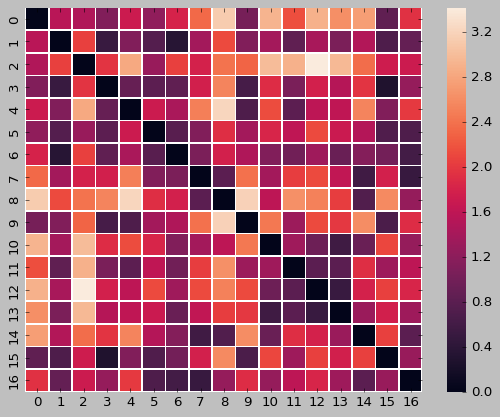

In [31]:
from scipy.spatial import distance_matrix
import seaborn as sns
import matplotlib.pylab as plt

dists = distance_matrix(X, X, p = 2)

ax = sns.heatmap(dists, linewidth=0.5)
plt.show()

In [32]:
print(X[3,:])
print(X[15,:])
print(np.sqrt(np.square(X[3,0]-X[15,0]) + np.square(X[3,1]-X[15,1])))

[-0.6  0.4]
[-0.4  0.6]
0.28284271247461895


**Ilustração da aplicação do $k-NN$ como regressor ou como classificador:**

![alt text](https://www.jeremyjordan.me/content/images/2017/06/Screen-Shot-2017-06-17-at-9.30.39-AM-1.png)

Nas próximas seções realizaremos a aplicação prática destas abordagens para o algoritmo.

#1 Aplicação do $k-NN$ como Classificador

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets

##1.1 Carga e separação do conjunto de dados

In [2]:
#Dataset iris
iris = datasets.load_iris()

X = iris.data    # data matrix
y = iris.target  # response vector

Separação do conjunto de dados em treinamento e teste

In [4]:
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)

In [9]:
from matplotlib import pyplot as plt

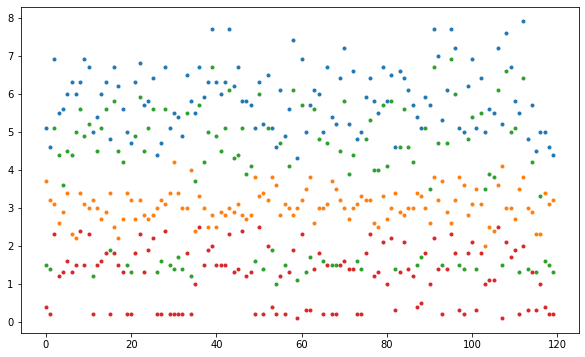

In [15]:
plt.figure(figsize=(10,6))
plt.plot(train_X, '.')

##1.2 Criação e aplicação do modelo de classificação

Criação do classificador $k-NN$ e treinamento do modelo

In [5]:
modelKNN = KNeighborsClassifier(n_neighbors=3) # k = 3
modelKNN.fit(train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Uso do modelo para classificação de um exemplo específico e posteriormente de todo o conjunto de dados de teste

In [6]:
# predict the class for example x = [1.1, 1.2, 3, 2] 
x = [1.1, 1.2, 3, 2]
print(modelKNN.predict([x]))

[1]


In [7]:
y_pred_prob_KNN = modelKNN.predict(test_X)

# Imprime as estimativas de probabilidades para cada classe
print(y_pred_prob_KNN)

[2 0 1 0 0 0 2 2 2 1 0 1 2 1 2 0 2 1 1 2 1 1 0 0 2 1 0 0 1 1]


#2 Aplicação do $k-NN$ como Regressor

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

##2.1 Carga e separação do conjunto de dados

In [17]:
#Carga do dataset
dataset = load_boston()
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [18]:
#Criação do data frame com os dados
boston_df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
print(boston_df.head(3))

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03

[3 rows x 13 columns]


In [19]:
#Separação de conjunto de dados de treino e teste
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=31)

##2.2 Normalização das características

In [20]:
#Normalização das características usando z-Score
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
boston_df = pd.DataFrame(X_train_scaled, columns = dataset.feature_names)
print(boston_df.head(3))

       CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
0 -0.389279  3.411723 -1.329831  ... -0.561453  0.294711 -1.125821
1 -0.386258  0.716968  0.573843  ... -0.028004  0.436368 -0.262037
2 -0.380684  0.369258 -0.607546  ...  0.149813  0.373055  0.171983

[3 rows x 13 columns]


##2.3 Treinamento e aplicação do modelo

In [22]:
# In a practical setting, n_neighbors has to be defined using model selection.
model = KNeighborsRegressor(n_neighbors = 15, weights = 'distance')

model.fit(X_train_scaled, y_train)  #fit the model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')

In [23]:
y_pred = model.predict(X_test_scaled) #make prediction on test set

In [27]:
#Avaliação do modelo
error = sqrt(mean_squared_error(y_test, y_pred)) #calculate rmse
rmse_val = []
rmse_val.append(error) #store rmse values
#print('RMSE value for k=%d is %.2f' % (K, error))
print(rmse_val)

[4.366723535719226]


##2.4 Uso do modelo treinamento para predição no conjunto de teste


In [28]:
#predicting on the test set
predict = model.predict(X_test_scaled)
print(predict)

[29.78252929 11.20146763 22.58566002 19.37586052 22.12751629 23.88051752
 13.12791871 26.59163314 23.68778568 22.41848925 11.60604178 17.70167531
 16.59409477 19.67498474 13.71306402 23.33749199 21.39179429 24.269708
 23.00760658 27.95830309 18.10596607 15.24818656 26.03779584 30.9786173
 21.40419585 20.11611709 19.04156177 23.29455283 18.39940582 25.02961109
 27.25077784 14.54389915 14.68468927 17.86629077 23.77445223 21.01960259
 29.2313585  13.37850695 15.241562   38.27544852 11.43085613 12.53630762
 16.82730516 30.209663   17.13448845 22.72272946 30.24059424 19.58881199
 25.58030639 26.15861046 21.17122616 19.02399843 12.07757777 30.35495096
 20.83730504 20.79969394 12.8143257  17.74687966 11.98949069 24.99848436
 17.0928395  12.80638575 23.11782657 27.76527974 10.59159148 10.54821999
 23.25034644 16.36073227 36.61065814 21.26300062 19.58547314 15.47081658
 31.67627884 20.61752473 17.08128794 33.3500836  22.79862086 21.39010704
 17.16639711 21.428738   32.62776957 24.82533151 24.52

#Considerações Finais

Alternatives do avoid overfitting:
* No optimal number of neighbors suits all kind of datasets. The value of $k$ for a particular dataset can be determined using model selection.
* Contrary to what one might think, $k$-NN can produce very complex decision boundaries.
* Model selection (measure performance on validation data for increasing values of k);
* Replace a bunch of points by their prototypes; 
* Remove outliers, i.e., remove data points for which all (or at least the majority) of the neighbor voronoi cells are from a different class.